1D Model Plot

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

In [2]:
plt.rcParams['figure.dpi'] = 300


In [7]:
output = loadmat('./data/run_for_python.mat')

/Users/claireyung/opt/anaconda3/lib/python3.9/site-packages/scipy/io/matlab/mio.py:226: MatReadWarning: Duplicate variable name "None" in stream - replacing previous with new
Consider mio5.varmats_from_mat to split file into single variable files
  matfile_dict = MR.get_variables(variable_names)


In [8]:
output.keys()

dict_keys(['__header__', '__version__', '__globals__', 'B', 'BF_S', 'BF_T', 'BF_X', 'BF_Y', 'Bf', 'Bft', 'Cp', 'Cs_rho', 'Cs_w', 'Cstar', 'DIR', 'DSDZ', 'DTDZ', 'DUDZ', 'DUDZ2', 'DVDY', 'DVDZ', 'DVDZ2', 'EKMO', 'EUC', 'EUCD', 'Forcing', 'G1s', 'G1sDZ', 'G1t', 'G1tDZ', 'G1v', 'G1vDZ', 'Gs', 'Gt', 'Gv', 'HSBL', 'Hsbl', 'Hz', 'Hzw', 'INT', 'JTbleddy', 'JTblmean', 'JTinteddy', 'JTintmean', 'JTnleddy', 'Jbl', 'JblT', 'Jint', 'JintT', 'Jnl', 'JnlT', 'JnlTmean', 'Jq', 'Jq_bl', 'Jq_nonlocal', 'Jq_shear', 'K0', 'KPPBL', 'KPPMLD', 'L', 'LB', 'N', 'N2', 'N2S', 'N2T', 'NOUT', 'NTi', 'Nt', 'Nz', 'PGF_X', 'PGFamp', 'PGFscale', 'PosVec', 'RSh2', 'RSh2T', 'Ri', 'Ri0', 'RiKPP', 'RiKPP_Denom', 'RiKPP_Numer', 'RiT', 'Ric', 'S', 'SI', 'SRST', 'SYM', 'Sh2', 'T', 'TAU_S', 'TAU_T', 'TAU_X', 'TAU_Y', 'TCLD', 'TI', 'TRST', 'TS_RST', 'TVAD', 'Ti', 'Tie', 'Tmean', 'Tr', 'Tw', 'U', 'UDIV', 'UPGF', 'URST', 'UVAD', 'Ustar', 'V', 'VRST', 'VVAD', 'Var', 'VarOp', 'Vstretching', 'Vtc', 'Vtransform', 'X', 'Xtime', 'Xtim

In [9]:
output['t']

array([[      0,     120,     240, ..., 3887760, 3887880, 3888000]],
      dtype=int32)

In [10]:
## period = 15 days = 
15*24*3600/120


10800.0

In [11]:
np.argmax(output['Forcing'])


2700

In [12]:
np.argmin(output['Forcing'])


8100

/var/folders/dq/psqyj9ns2m9b5kxdvtqz90bm0000gp/T/ipykernel_41258/2574752750.py:16: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  c1 = axes[i].pcolormesh(output['Tw'][1:-1,:],output['Zw'][1:-1,:],output[varnames[i]],\
/var/folders/dq/psqyj9ns2m9b5kxdvtqz90bm0000gp/T/ipykernel_41258/2574752750.py:16: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  c1 = axes[i].pcolormesh(output['Tw'][1:-1,:],output['Zw'][1:-1,:],output[varnames[i]],\
/var/folders/dq/psqyj9ns2m9b

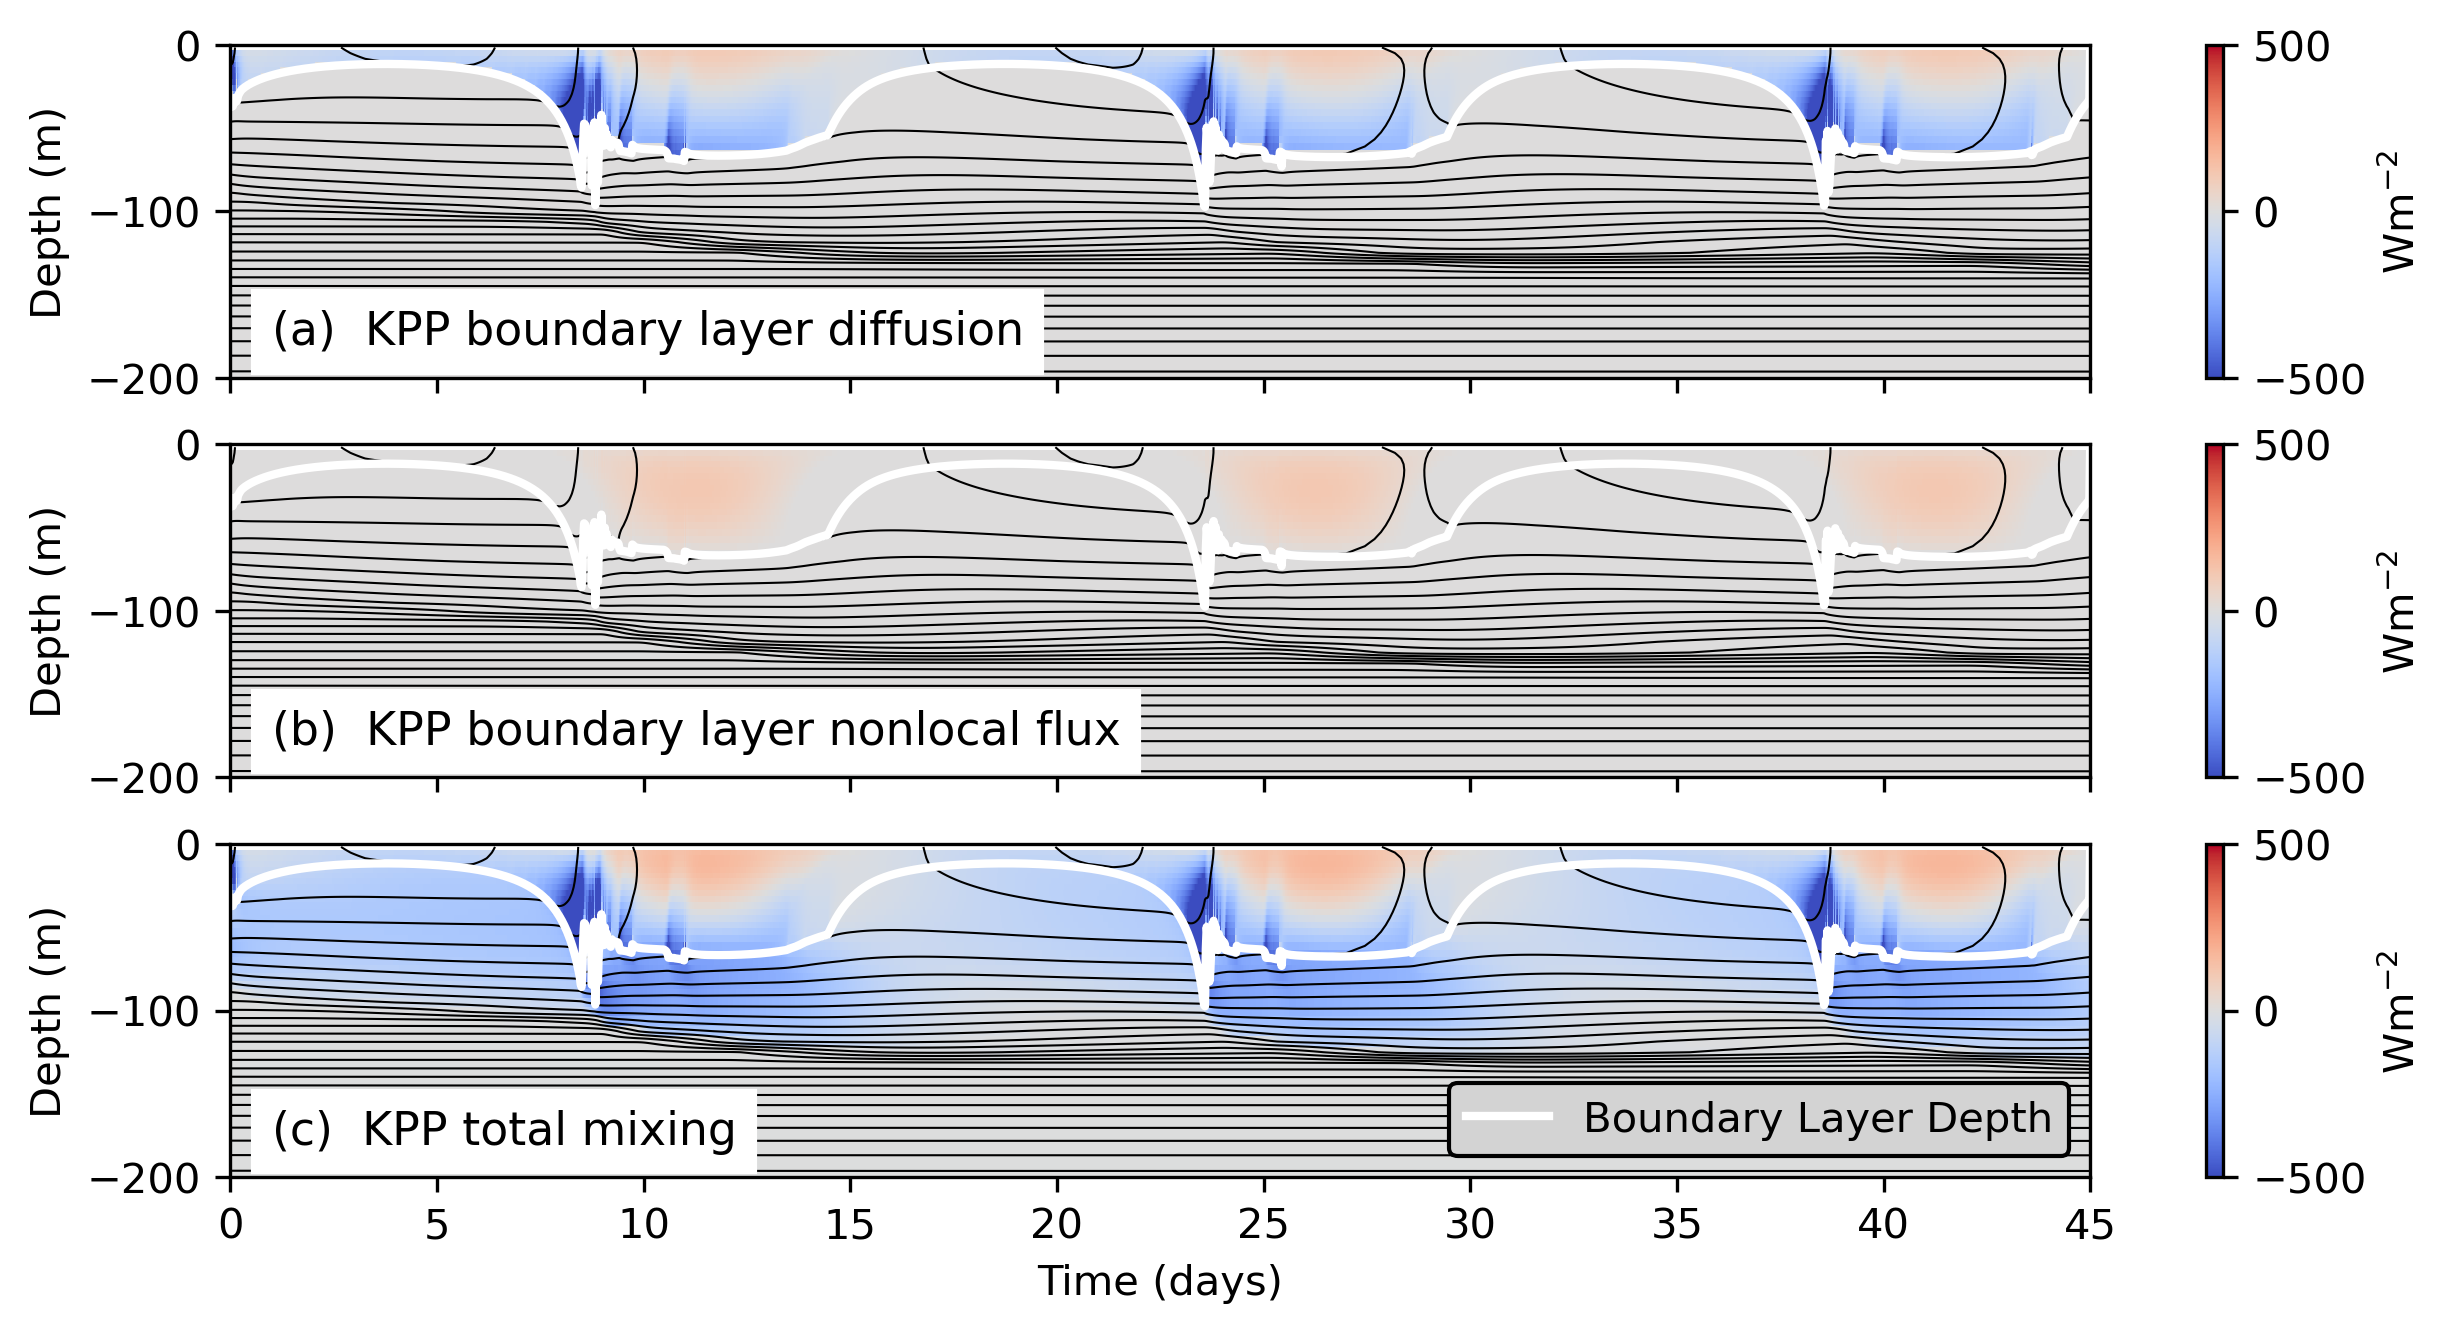

In [34]:
fig, axes = plt.subplots(figsize = (10,5), nrows = 3, ncols = 1,sharex = True)
cmap = 'coolwarm'
vmin = -500
vmax = 500
g = output['g'][0,0]
rho0 = output['rho0'][0,0]
## only plot every 15 times to make nicer
tvec = output['tvec'][0]-1

varnames = ['Jq_bl','Jq_nonlocal','Jq']
varlongnames = ['KPP boundary layer diffusion',\
                'KPP boundary layer nonlocal flux',\
                'KPP total mixing']
figlabel = ['(a)  ','(b)  ','(c)  ']
for i in np.arange(3):
    c1 = axes[i].pcolormesh(output['Tw'][1:-1,:],output['Zw'][1:-1,:],output[varnames[i]],\
                       cmap = cmap, vmin = vmin, vmax = vmax)
    plt.colorbar(c1, ax = axes[i],label = 'Wm$^{-2}$')
    axes[i].contour(output['Tr'][:,tvec],output['Zr'][:,tvec],output['Bft'][:,tvec],levels = g/rho0*np.arange(-40,0,0.1),colors = 'k',linestyles = '-', linewidths = 0.5)
    axes[i].plot(output['t'][0,tvec]/86400,output['Hsbl'][0,tvec],color = 'w',linewidth = 2,label = 'Boundary Layer Depth')
    #axes[i].plot(output['t'][0,tvec]/86400,output['EUC'][tvec],color = 'k',linewidth = 2,label = 'Max Velocity Shear')
    axes[i].set_ylim(-200,0)
    axes[i].set_ylabel('Depth (m)')
    axes[i].text(1,-180,figlabel[i]+varlongnames[i],backgroundcolor = 'w',fontsize = 11)
axes[2].set_xlabel('Time (days)')
axes[2].legend(loc = 'lower right',bbox_to_anchor = (1,0),facecolor = 'lightgrey',edgecolor = 'k',framealpha=1)

plt.savefig('1D_colorplot.png',dpi = 300)

In [13]:
np.mean(output['T'][0,np.argmax(output['Forcing'])-20:np.argmax(output['Forcing'])+20])

11.095160414148333

In [14]:
output['T'][0,np.argmin(output['Forcing'])-20:np.argmin(output['Forcing'])+20]

array([11.09917913, 11.0991797 , 11.09918027, 11.09918084, 11.0991814 ,
       11.09918197, 11.09918254, 11.09918311, 11.09918367, 11.09918424,
       11.09918481, 11.09918537, 11.09918594, 11.09918651, 11.09918707,
       11.09918764, 11.09918821, 11.09918877, 11.09918934, 11.09918991,
       11.09919047, 11.09919104, 11.09919161, 11.09919217, 11.09919274,
       11.09919331, 11.09919387, 11.09919444, 11.099195  , 11.09919557,
       11.09919614, 11.0991967 , 11.09919727, 11.09919783, 11.0991984 ,
       11.09919897, 11.09919953, 11.0992001 , 11.09920066, 11.09920123])

In [15]:
idx_stable = np.concatenate((np.arange(np.argmax(output['Forcing'])-20,np.argmax(output['Forcing'])+20),
                       np.arange(np.argmax(output['Forcing'])-20,np.argmax(output['Forcing'])+20)+10800,
                       np.arange(np.argmax(output['Forcing'])-20,np.argmax(output['Forcing'])+20)+10800*2))
idx_unstable = np.concatenate((np.arange(np.argmin(output['Forcing'])-20,np.argmin(output['Forcing'])+20),
                       np.arange(np.argmin(output['Forcing'])-20,np.argmin(output['Forcing'])+20)+10800,
                       np.arange(np.argmin(output['Forcing'])-20,np.argmin(output['Forcing'])+20)+10800*2))


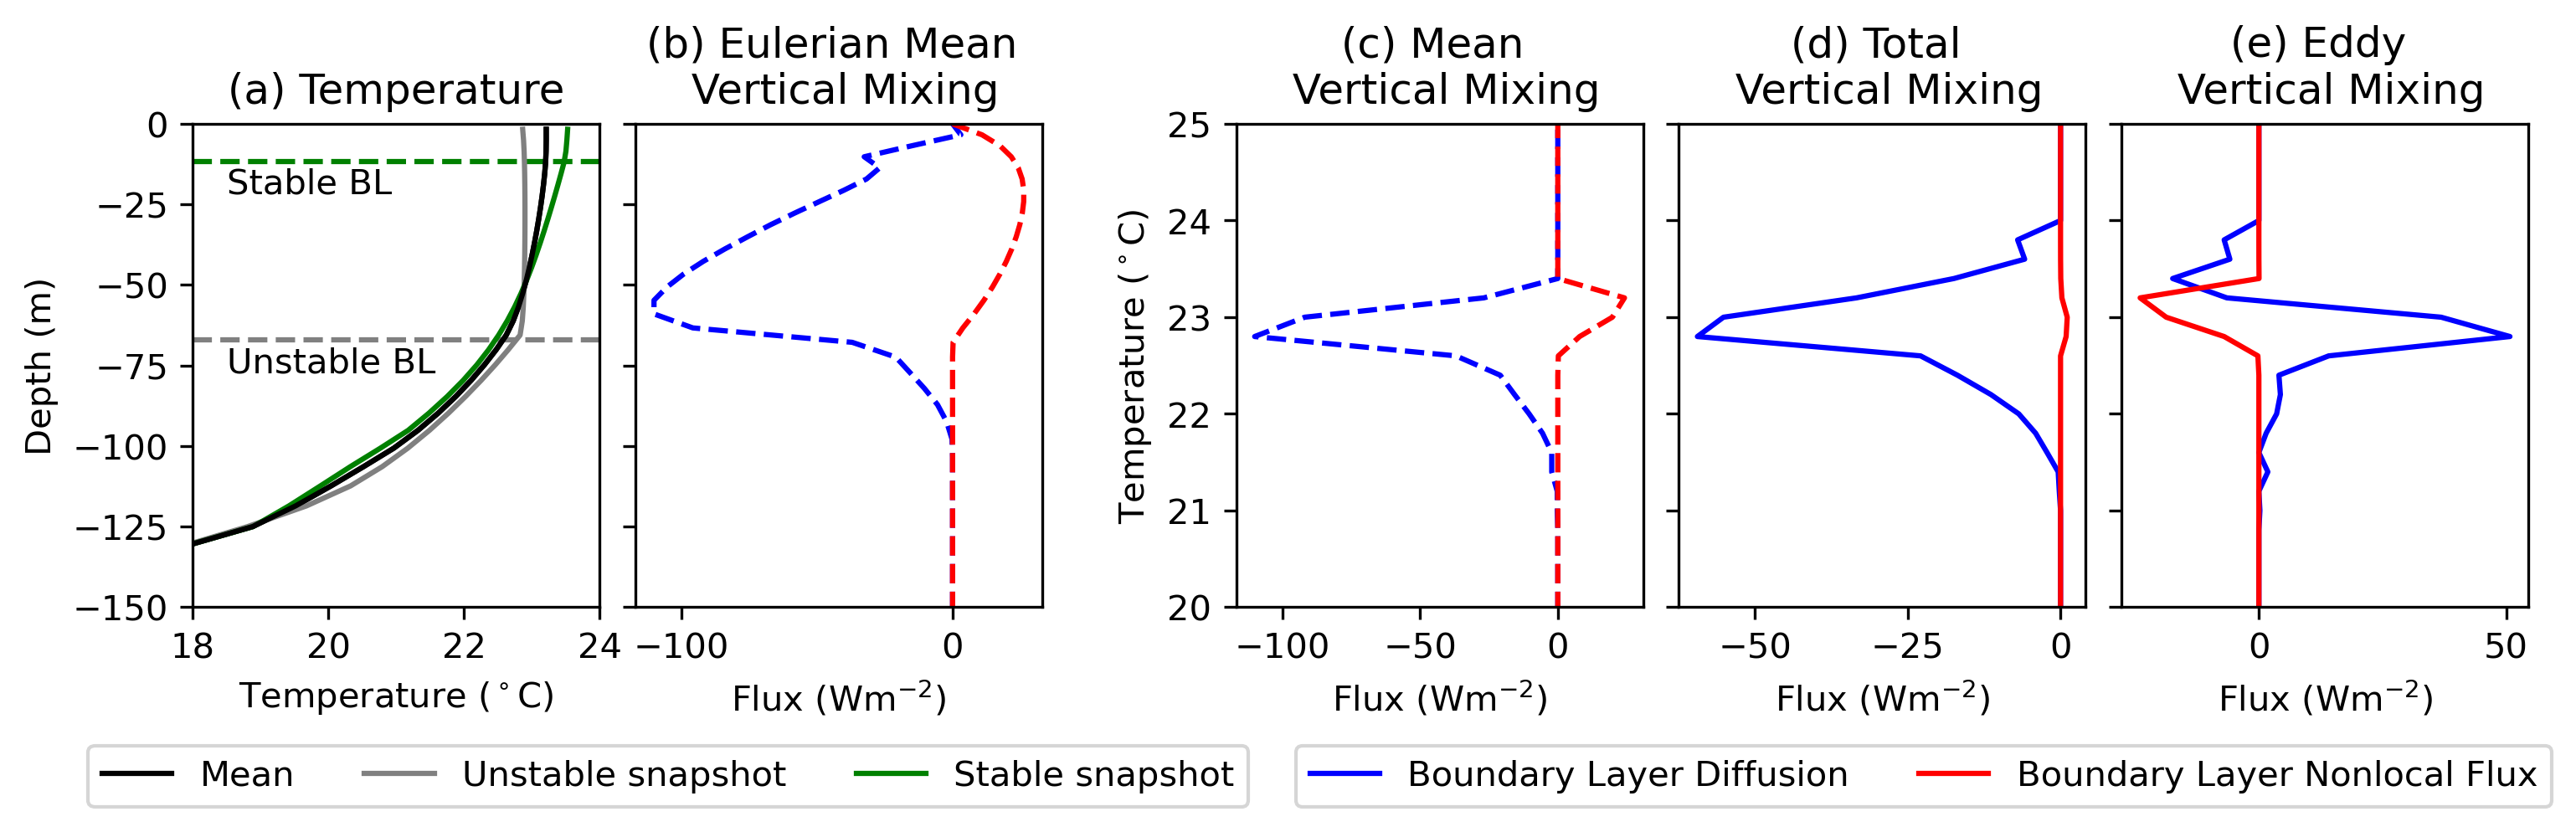

In [16]:
fig, axes = plt.subplots(figsize = (12,3.5), nrows = 1, ncols = 6,gridspec_kw={'width_ratios': [1,1,0.3,1,1,1]})

axes[0].plot(output['Tmean'],output['z_rho'],label = 'Mean',color = 'k')
axes[0].plot(np.mean(output['T'][:,idx_unstable],1),output['z_rho'],label = 'Unstable snapshot',color = 'grey')
axes[0].plot(np.mean(output['T'][:,idx_stable],1),output['z_rho'],label = 'Stable snapshot',color = 'green')
axes[0].hlines(np.mean(output['Hsbl'][0,idx_unstable]),18,24,color = 'grey',linestyle = '--')
axes[0].text(18.5,np.mean(output['Hsbl'][0,idx_unstable])-10,'Unstable BL')
axes[0].hlines(np.mean(output['Hsbl'][0,idx_stable]),18,24,color = 'green',linestyle = '--')
axes[0].text(18.5,np.mean(output['Hsbl'][0,idx_stable])-10,'Stable BL')

axes[0].plot(output['Tmean'],output['z_rho'],color = 'k')
axes[0].legend(bbox_to_anchor = (-0.3,-0.25),loc = 'upper left',ncol=3)
axes[0].set_ylabel('Depth (m)')
axes[0].set_xlabel('Temperature ($^\circ$C)')
axes[0].set_title('(a) Temperature')
axes[0].set_ylim(-150,0)
axes[0].set_xlim(18,24)


axes[1].plot(np.mean(output['Jbl'],1),output['z_w'],color = 'b', label = 'BL Diffusion', linestyle = '--')
axes[1].plot(np.mean(output['Jnl'],1),output['z_w'],color = 'r', label = 'BL Nonlocal Flux', linestyle = '--')
#axes[1].plot(np.mean(output['Jint'],1),output['z_w'],color = 'k', label = 'Interior Diffusion', linestyle = '--')
axes[1].get_yaxis().set_ticklabels([])
axes[1].set_xlabel('Flux (Wm$^{-2}$)')
axes[1].set_title('(b) Eulerian Mean \n Vertical Mixing')
axes[1].set_ylim(-150,0)

# make space for temperature label
axes[2].axis('off')

axes[3].plot(output['JTblmean'],output['Tie'][0],color = 'b', label = 'BL Diffusion Mean', linestyle = '--')
axes[3].plot(output['JnlTmean'],output['Tie'][0],color = 'r', label = 'BL Nonlocal Flux Mean', linestyle = '--')
#axes[3].plot(output['JTintmean'],output['Tie'][0],color = 'k', label = 'Interior Diffusion Mean', linestyle = '--')
axes[3].set_xlabel('Flux (Wm$^{-2}$)')
axes[3].set_ylabel('Temperature ($^\circ$C)')
axes[3].set_title('(c) Mean \n Vertical Mixing')
axes[3].set_ylim(20,25)

axes[4].plot(np.mean(output['JblT'],1),output['Tie'][0],color = 'b', label = 'BL Diffusion Total', linestyle = '-')
axes[4].plot(np.mean(output['JnlT'],1),output['Tie'][0],color = 'r', label = 'BL Nonlocal Flux Total', linestyle = '-')
#axes[4].plot(np.mean(output['JintT'],1),output['Tie'][0],color = 'k', label = 'Interior Diffusion Total', linestyle = '-')
axes[4].get_yaxis().set_ticklabels([])
axes[4].set_xlabel('Flux (Wm$^{-2}$)')
axes[4].set_title('(d) Total \n Vertical Mixing')
axes[4].set_ylim(20,25)

axes[5].plot(output['JTbleddy'],output['Tie'][0],color = 'b', label = 'Boundary Layer Diffusion')
axes[5].plot(output['JTnleddy'],output['Tie'][0],color = 'r', label = 'Boundary Layer Nonlocal Flux')
#axes[5].plot(output['JTinteddy'],output['Tie'][0],color = 'k', label = 'Interior Diffusion')
axes[5].get_yaxis().set_ticklabels([])
axes[5].legend(bbox_to_anchor = (1.1,-0.25),loc = 'upper right',ncol=3)
axes[5].set_xlabel('Flux (Wm$^{-2}$)')
axes[5].set_title('(e) Eddy \n Vertical Mixing')
axes[5].set_ylim(20,25)

plt.subplots_adjust(wspace = 0.1,top = 0.85,bottom = 0.3)
plt.savefig('1D_lineplot.png',dpi = 300)